# Klasifikasi Sentimen Berdasarkan Aspek

## 1. Load Dataset

In [1]:
import pandas as pd
data_lexicon = pd.read_csv('lexicon/Hasil_Preprocessing_Pelabelan.csv')
data_manual = pd.read_csv('lexicon/Hasil_Preprocessing_manual.csv')

In [2]:
data_lexicon.head(10)

,Waktu,Data,Data_Tokens,Data_Tokens_Stopwords,Data_Tokens_Stemming,Data_Preprocessing,polarity_score,polarity
0,9/5/2021 0:31,selamat pagi bisa saja mereka minum kopi merek...,"['selamat', 'pagi', 'bisa', 'saja', 'mereka', ...","['selamat', 'pagi', 'minum', 'kopi', 'sengaja'...","['selamat', 'pagi', 'minum', 'kopi', 'sengaja'...","['selamat', 'pagi', 'minum', 'kopi', 'sengaja'...",8,positive
1,9/17/2021 12:48,sosialisasi aplikasi peduli lindungi satlantas...,"['sosialisasi', 'aplikasi', 'peduli', 'lindung...","['sosialisasi', 'aplikasi', 'peduli', 'lindung...","['sosialisasi', 'aplikasi', 'peduli', 'lindung...","['sosialisasi', 'aplikasi', 'peduli', 'lindung...",3,positive
2,9/18/2021 1:44,saya kan kemarin mendaftarkan orang tua saya v...,"['saya', 'kan', 'kemarin', 'mendaftarkan', 'or...","['kemarin', 'mendaftarkan', 'orang', 'tua', 'v...","['kemarin', 'daftar', 'orang', 'tua', 'vaksin'...","['kemarin', 'daftar', 'orang', 'tua', 'vaksin'...",5,positive
3,9/22/2021 5:43,aplikasi peduli lindungi soalnya ada kata meli...,"['aplikasi', 'peduli', 'lindungi', 'soalnya', ...","['aplikasi', 'peduli', 'lindungi', 'melindungi']","['aplikasi', 'peduli', 'lindung', 'lindung']","['aplikasi', 'peduli', 'lindung', 'lindung']",7,positive
4,9/17/2021 2:27,data nomor induk kependudukan tidak ditemukan ...,"['data', 'nomor', 'induk', 'kependudukan', 'ti...","['data', 'nomor', 'induk', 'kependudukan', 'di...","['data', 'nomor', 'induk', 'duduk', 'temu', 'p...","['data', 'nomor', 'induk', 'duduk', 'temu', 'p...",7,positive
5,9/16/2021 5:23,berantakannya aplikasi peduli lindungi,"['berantakannya', 'aplikasi', 'peduli', 'lindu...","['berantakannya', 'aplikasi', 'peduli', 'lindu...","['beranta', 'aplikasi', 'peduli', 'lindung']","['beranta', 'aplikasi', 'peduli', 'lindung']",3,positive
6,9/9/2021 7:23,ini saya kalau mau masuk pakai scan barcode ap...,"['ini', 'saya', 'kalau', 'mau', 'masuk', 'paka...","['masuk', 'pakai', 'scan', 'barcode', 'aplikas...","['masuk', 'pakai', 'scan', 'barcode', 'aplikas...","['masuk', 'pakai', 'scan', 'barcode', 'aplikas...",3,positive
7,9/4/2021 9:55,intinya sebenarnya mereka semua asn harus puny...,"['intinya', 'sebenarnya', 'mereka', 'semua', '...","['intinya', 'asn', 'aplikasi', 'peduli', 'lind...","['inti', 'asn', 'aplikasi', 'peduli', 'lindung...","['inti', 'asn', 'aplikasi', 'peduli', 'lindung...",5,positive
8,9/21/2021 11:37,kawan kalau ke mall masih harus pakai aplikasi...,"['kawan', 'kalau', 'ke', 'mall', 'masih', 'har...","['kawan', 'mall', 'pakai', 'aplikasi', 'peduli...","['kawan', 'mall', 'pakai', 'aplikasi', 'peduli...","['kawan', 'mall', 'pakai', 'aplikasi', 'peduli...",3,positive
9,9/21/2021 22:01,nanti masuk universitas padjajaran harus scan ...,"['nanti', 'masuk', 'universitas', 'padjajaran'...","['masuk', 'universitas', 'padjajaran', 'scan',...","['masuk', 'universitas', 'padjajaran', 'scan',...","['masuk', 'universitas', 'padjajaran', 'scan',...",7,positive


In [3]:
data_manual.head(10)

,Waktu,Data,data_tokens,data_tokens_stopwords,data_tokens_stemmed,data_preprocessed,Sentiment
0,9/5/2021 0:31,selamat pagi bisa saja mereka minum kopi merek...,"['selamat', 'pagi', 'bisa', 'saja', 'mereka', ...","['selamat', 'pagi', 'minum', 'kopi', 'sengaja'...","['selamat', 'pagi', 'minum', 'kopi', 'sengaja'...","['selamat', 'pagi', 'minum', 'kopi', 'sengaja'...",neutral
1,9/17/2021 12:48,sosialisasi aplikasi peduli lindungi satuan la...,"['sosialisasi', 'aplikasi', 'peduli', 'lindung...","['sosialisasi', 'aplikasi', 'peduli', 'lindung...","['sosialisasi', 'aplikasi', 'peduli', 'lindung...","['sosialisasi', 'aplikasi', 'peduli', 'lindung...",neutral
2,9/18/2021 1:44,saya kan kemarin mendaftarkan orang tua saya v...,"['saya', 'kan', 'kemarin', 'mendaftarkan', 'or...","['kemarin', 'mendaftarkan', 'orang', 'tua', 'v...","['kemarin', 'daftar', 'orang', 'tua', 'vaksin'...","['kemarin', 'daftar', 'orang', 'tua', 'vaksin'...",neutral
3,9/22/2021 5:43,aplikasi peduli lindungi soalnya ada kata meli...,"['aplikasi', 'peduli', 'lindungi', 'soalnya', ...","['aplikasi', 'peduli', 'lindungi', 'melindungi']","['aplikasi', 'peduli', 'lindung', 'lindung']","['aplikasi', 'peduli', 'lindung', 'lindung']",positive
4,9/17/2021 2:27,data nomor induk kependudukan tidak ditemukan ...,"['data', 'nomor', 'induk', 'kependudukan', 'ti...","['data', 'nomor', 'induk', 'kependudukan', 'di...","['data', 'nomor', 'induk', 'duduk', 'temu', 'p...","['data', 'nomor', 'induk', 'duduk', 'temu', 'p...",negative
5,9/16/2021 5:23,berantakannya aplikasi peduli lindungi,"['berantakannya', 'aplikasi', 'peduli', 'lindu...","['berantakannya', 'aplikasi', 'peduli', 'lindu...","['beranta', 'aplikasi', 'peduli', 'lindung']","['beranta', 'aplikasi', 'peduli', 'lindung']",negative
6,9/9/2021 7:23,ini saya kalau mau masuk pakai scan barcode ap...,"['ini', 'saya', 'kalau', 'mau', 'masuk', 'paka...","['masuk', 'pakai', 'scan', 'barcode', 'aplikas...","['masuk', 'pakai', 'scan', 'barcode', 'aplikas...","['masuk', 'pakai', 'scan', 'barcode', 'aplikas...",neutral
7,9/4/2021 9:55,intinya sebenarnya mereka semua asn harus puny...,"['intinya', 'sebenarnya', 'mereka', 'semua', '...","['intinya', 'asn', 'aplikasi', 'peduli', 'lind...","['inti', 'asn', 'aplikasi', 'peduli', 'lindung...","['inti', 'asn', 'aplikasi', 'peduli', 'lindung...",positive
8,9/21/2021 11:37,kawan kalau ke mall masih harus pakai aplikasi...,"['kawan', 'kalau', 'ke', 'mall', 'masih', 'har...","['kawan', 'mall', 'pakai', 'aplikasi', 'peduli...","['kawan', 'mall', 'pakai', 'aplikasi', 'peduli...","['kawan', 'mall', 'pakai', 'aplikasi', 'peduli...",neutral
9,9/21/2021 22:01,nanti masuk universitas padjajaran harus scan ...,"['nanti', 'masuk', 'universitas', 'padjajaran'...","['masuk', 'universitas', 'padjajaran', 'scan',...","['masuk', 'universitas', 'padjajaran', 'scan',...","['masuk', 'universitas', 'padjajaran', 'scan',...",neutral


In [5]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
data_lexicon["Data_Tweet_Preprocessing"]= data_lexicon['Data_Preprocessing'].apply(join_text_list)

data_lexicon["Data_Tweet_Preprocessing"].head(10)

0    selamat pagi minum kopi sengaja manfaat aplika...
1    sosialisasi aplikasi peduli lindung satlantas ...
2    kemarin daftar orang tua vaksin peduli lindung...
3                      aplikasi peduli lindung lindung
4    data nomor induk duduk temu peduli lindung hub...
5                      beranta aplikasi peduli lindung
6     masuk pakai scan barcode aplikasi peduli lindung
7    inti asn aplikasi peduli lindung minta tri seh...
8             kawan mall pakai aplikasi peduli lindung
9     masuk universitas padjajaran scan peduli lindung
Name: Data_Tweet_Preprocessing, dtype: object

In [6]:
data_lexicon['label_num_lexicon'] = data_lexicon.polarity.map({'positive':1,'negative':-1,'neutral':0})
data_manual['label_num_manual'] = data_manual.Sentiment.map({'positive':1,'negative':-1,'neutral':0})

data ={'Data_Tweet' : data_lexicon["Data_Tweet_Preprocessing"],
        'lexicon_based': data_lexicon['polarity'],
       'label_num_lexicon' : data_lexicon.label_num_lexicon,
       'ahli_bahasa' : data_manual['Sentiment'],
       'label_num_manual' : data_lexicon.label_num_lexicon}

sentimen_tweet = pd.DataFrame(data)

In [7]:
# Export to csv file
sentimen_tweet.to_csv(r'lexicon/Perbandingan_Kelas_Sentimen.csv', index = False, header = True,index_label=None)

## 2. Load Dataset Per-Kolom

In [9]:
import numpy as np  
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [10]:
data = pd.read_csv("aspek/Perbandingan_Kelas_Sentimen.csv",sep=",")
pd.set_option('max_colwidth',1)
data

,Data_Tweet,aspek,lexicon_based,ahli_bahasa
0,selamat pagi bisa saja mereka minum kopi mereka dengan sengaja memanfaatkan aplikasi peduli lindungi,aplikasi,positive,neutral
1,sosialisasi aplikasi peduli lindungi satuan lalu lintas polres pesisir selatan polda metro,aplikasi,positive,neutral
2,saya kan kemarin mendaftarkan orang tua saya vaksin di peduli lindungi sekarang status nya seperti ini terus langkah selanjutnya harus gimana ya,layanan,positive,neutral
3,aplikasi peduli lindungi soalnya ada kata melindungi kamu,aplikasi,positive,positive
4,data nomor induk kependudukan tidak ditemukan di peduli lindungi hubungi satu data vaksinasi di pusat telepon hot line peduli lindungi,aplikasi,positive,negative
...,...,...,...,...
3176,yuanita menambahkan peserta vaksinasi harus mendaftar di elektronik vaksin yang tersedia di website isi biodata dan mengisi formulir vaksin,data,negative,positive
3177,yuk kita pakai peduli lindungi,aplikasi,positive,positive
3178,yuk segera unduh aplikasi peduli lindungi mulai tanggal september masuk supermarket kini wajib menggunakan peduli lidungi,aplikasi,positive,positive
3179,yuk sobat segera pasang atau unduh aplikasi peduli lindungi ya agar kita dapat selalu mencegah penyebaran covid,aplikasi,positive,positive


In [11]:
data_lex= data['lexicon_based'].value_counts()
data_pak= data['ahli_bahasa'].value_counts()

kategori_1 = data_lex.index
frekuensi_1 = data_lex.values

kategori_2 = data_pak.index
frekuensi_2 = data_pak.values

print('Jumlah Kelas Lexicon Based')
print(kategori_1)
print(frekuensi_1,'\n')

print('Jumlah Kelas Ahli Bahasa')
print(kategori_2)
print(frekuensi_2)

Jumlah Kelas Lexicon Based
Index(['positive', 'negative', 'neutral'], dtype='object')
[2372  640  169] 

Jumlah Kelas Ahli Bahasa
Index(['negative', 'positive', 'neutral'], dtype='object')
[1265 1247  669]


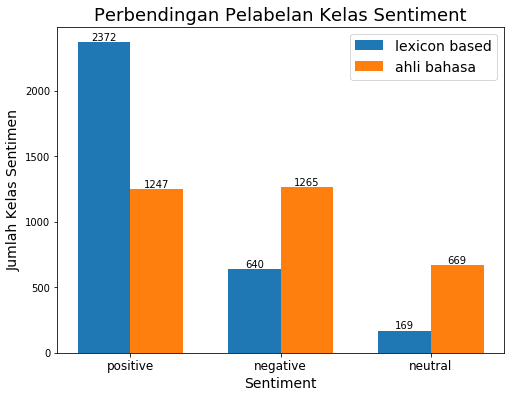

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
w=0.35

x = ['positive', 'negative', 'neutral']
frekuensi_1 = (data_lex.values)
frekuensi_2 = (data_pak.value_counts().index)

bar1 = np.arange(len(x))

lb = ax.bar(bar1-w/2, frekuensi_1, w, label="lexicon based")
p = ax.bar(bar1+w/2, frekuensi_2, w, label="ahli bahasa")

ax.set_title("Perbendingan Pelabelan Kelas Sentiment", size=18)
ax.set_xlabel("Sentiment", size=14)
ax.set_ylabel("Jumlah Kelas Sentimen", size=14)
ax.set_xticks(bar1)
ax.set_xticklabels(x, size=12)
ax.legend(fontsize=14)

def autolabel(lb):
    for rect in lb:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(lb)
autolabel(p)

plt.show()

# 3. Menentukan Aspek Per-Dokumen Tweet

Aspek yang digunakan `Aplkasi` `Data` `Layanan` 

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
kategori_aspek = data.groupby(['aspek'])['aspek'].count()
kategori_aspek

aspek
aplikasi    2071
data        498 
layanan     612 
Name: aspek, dtype: int64

Kategori Aspek Aplikasi Peduli Lindungi


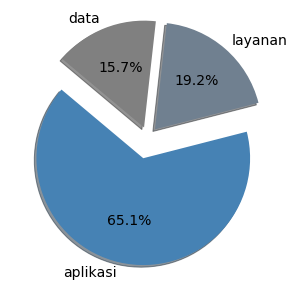

In [15]:
import matplotlib.pyplot as plt
 
# Data to plot
print('Kategori Aspek Aplikasi Peduli Lindungi')
fig, ax= plt.subplots(figsize=(5,5))
labels = list(data['aspek'].value_counts().index)
sizes = [count for count in data['aspek'].value_counts()]
colors = ['steelblue', 'slategray', 'gray']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
 
plt.axis('equal')
plt.show()


## Visualisasi Berdasarkan Aspek Aplikasi

In [16]:
aspek_aplikasi = data[data['aspek']=='aplikasi'].groupby(['aspek'])['lexicon_based'].value_counts()
aspek_aplikasi

aspek     lexicon_based
aplikasi  positive         1595
          negative         381 
          neutral          95  
Name: lexicon_based, dtype: int64

Berdasarkan : Aspek Aplikasi-Lexicon Based


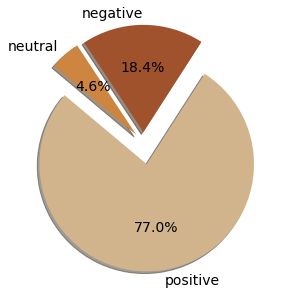

In [17]:
import matplotlib.pyplot as plt
 
# Data to plot
print('Berdasarkan : Aspek Aplikasi-Lexicon Based')
fig, ax= plt.subplots(figsize=(5,5))
labels = ['positive', 'negative', 'neutral']
sizes = aspek_aplikasi
colors = ['tan', 'sienna', 'peru']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
 
plt.axis('equal')
plt.show()

In [18]:
aspek_aplikasi_ab = data[data['aspek']=='aplikasi'].groupby(['aspek'])['ahli_bahasa'].value_counts()
aspek_aplikasi_ab

aspek     ahli_bahasa
aplikasi  positive       878
          negative       804
          neutral        389
Name: ahli_bahasa, dtype: int64

Berdasarkan : Aspek Aplikasi-Ahli Bahasa


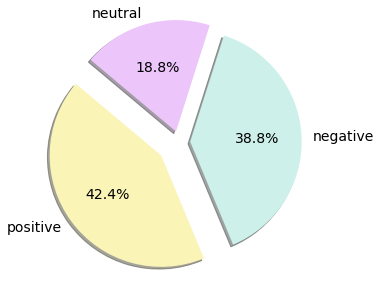

In [19]:
# Data to plot
print('Berdasarkan : Aspek Aplikasi-Ahli Bahasa')
fig, ax= plt.subplots(figsize=(5,5))
labels = ['positive', 'negative', 'neutral']
sizes = aspek_aplikasi_ab
colors = ['#FAF4B7', '#CDF0EA', '#ECC5FB']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
 
plt.axis('equal')
plt.show()

## Visualisasi Berdasarkan Aspek Data

In [20]:
aspek_data = data[data['aspek']=='data'].groupby(['aspek'])['lexicon_based'].value_counts()
aspek_data

aspek  lexicon_based
data   positive         324
       negative         138
       neutral          36 
Name: lexicon_based, dtype: int64

Berdasarkan : Aspek Data-Lexicon Based


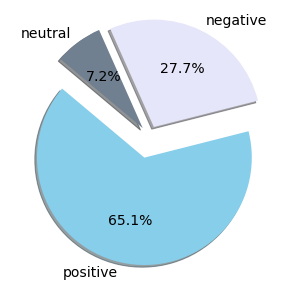

In [21]:
import matplotlib.pyplot as plt
 
# Data to plot
print('Berdasarkan : Aspek Data-Lexicon Based')
fig, ax= plt.subplots(figsize=(5,5))
labels = ['positive', 'negative', 'neutral']
sizes = aspek_data.rename('percentage')
colors = ['skyblue', 'lavender', 'slategrey']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
 
plt.axis('equal')
plt.show()

In [22]:
aspek_data_ab = data[data['aspek']=='data'].groupby(['aspek'])['ahli_bahasa'].value_counts()
aspek_data_ab

aspek  ahli_bahasa
data   negative       257
       positive       169
       neutral        72 
Name: ahli_bahasa, dtype: int64

Berdasarkan : Aspek Data-Ahli Bahasa


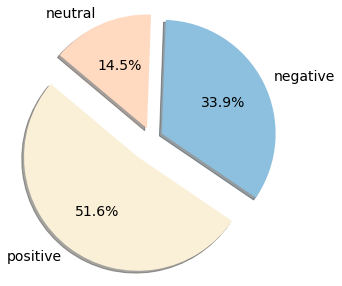

In [23]:
import matplotlib.pyplot as plt
 
# Data to plot
print('Berdasarkan : Aspek Data-Ahli Bahasa')
fig, ax= plt.subplots(figsize=(5,5))
labels = ['positive', 'negative', 'neutral']
sizes = aspek_data_ab.rename('percentage')
colors = ['#FAF0D7', '#8CC0DE', '#FFD9C0']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
 
plt.axis('equal')
plt.show()

## Visualisasi Berdasarkan Aspek Layanan

In [24]:
aspek_layanan = data[data['aspek']=='layanan'].groupby(['aspek'])['lexicon_based'].value_counts()
aspek_layanan

aspek    lexicon_based
layanan  positive         453
         negative         121
         neutral          38 
Name: lexicon_based, dtype: int64

Berdasarkan : Aspek Layanan-Lexicon Based


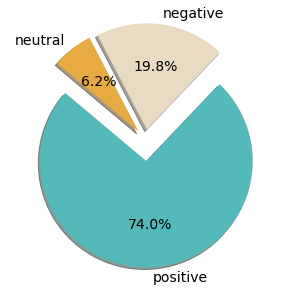

In [25]:
import matplotlib.pyplot as plt
 
# Data to plot
print('Berdasarkan : Aspek Layanan-Lexicon Based')
fig, ax= plt.subplots(figsize=(5,5))
labels = ['positive', 'negative', 'neutral']
sizes = aspek_layanan.rename('percentage')
colors = ['#54BAB9', '#E9DAC1', '#E8AA42']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
 
plt.axis('equal')
plt.show()

In [26]:
aspek_layanan_ab = data[data['aspek']=='layanan'].groupby(['aspek'])['ahli_bahasa'].value_counts()
aspek_layanan_ab

aspek    ahli_bahasa
layanan  neutral        208
         negative       204
         positive       200
Name: ahli_bahasa, dtype: int64

Berdasarkan : Aspek Layanan-Ahli Bahasa


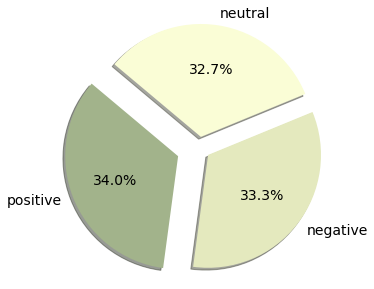

In [27]:
import matplotlib.pyplot as plt
 
# Data to plot
print('Berdasarkan : Aspek Layanan-Ahli Bahasa')
fig, ax= plt.subplots(figsize=(5,5))
labels = ['positive', 'negative', 'neutral']
sizes = aspek_layanan_ab.rename('percentage')
colors = ['#A2B38B', '#E4E9BE', '#FAFDD6']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
 
plt.axis('equal')
plt.show()